In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load data

In [2]:
STANDARDIZE = False

digits = load_digits()
    
if STANDARDIZE:
    scaler = StandardScaler()
    digits['data'] = scaler.fit_transform(digits['data'])

digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

### Dimensionality Reduction

In [3]:
x_2d = TSNE(n_components=2, random_state=0).fit_transform(digits['data'])

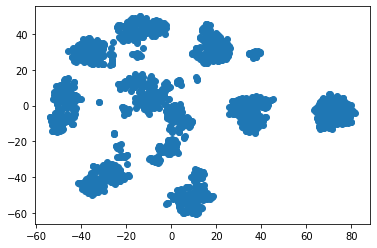

In [4]:
plt.scatter(x_2d[:,0], x_2d[:,1])

### Clustering

In [5]:
model = KMeans(init='k-means++', n_clusters=10, n_init=10)
model.fit(digits['data'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
model.cluster_centers_.shape
model.labels_

array([5, 2, 2, ..., 2, 1, 1])

### Visualize results

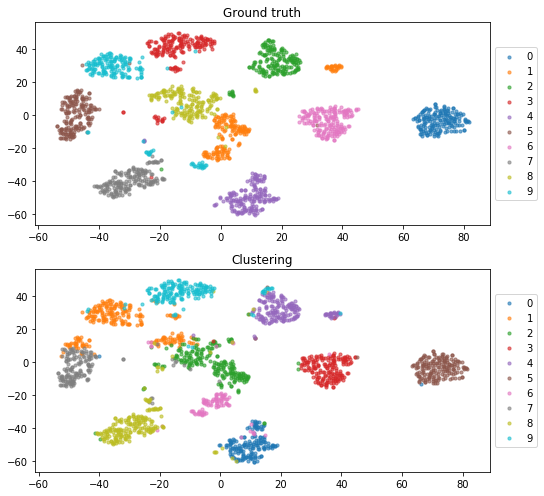

In [7]:
fig, ax = plt.subplots(2, figsize=(7,7))

# | plot ground truth

for label in digits['target_names']:
    ax[0].scatter(x_2d[digits['target'] == label, 0], x_2d[digits['target'] == label, 1], label=label, marker="o", s=10, alpha=0.6)
    
box = ax[0].get_position()
ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current ax[0]is
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set_title('Ground truth')

# | plot found clustering
cluster_ids = np.unique(model.labels_)
for label in cluster_ids:
    ax[1].scatter(x_2d[model.labels_ == label, 0], x_2d[model.labels_ == label, 1], label=label, marker="o", s=10, alpha=0.6)
    
box = ax[1].get_position()
ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current ax[0]is
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].set_title('Clustering')

fig.tight_layout()

### Assign clusters to labels

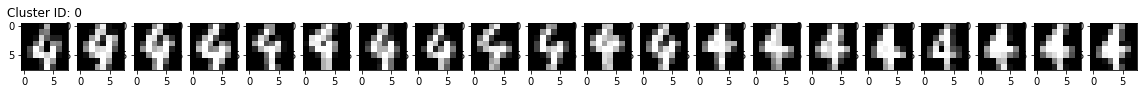

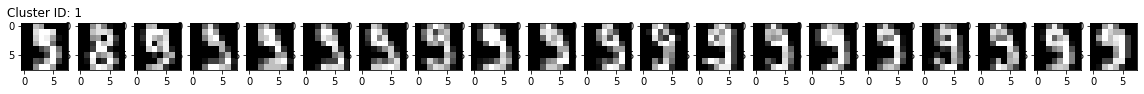

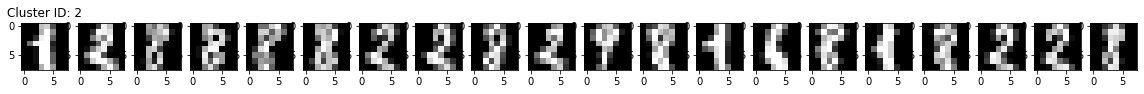

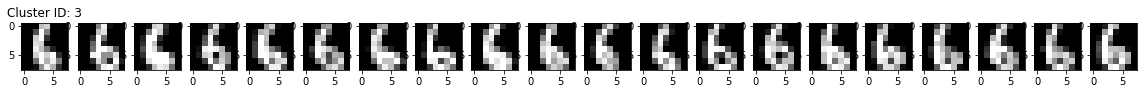

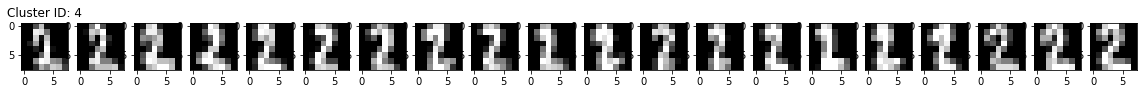

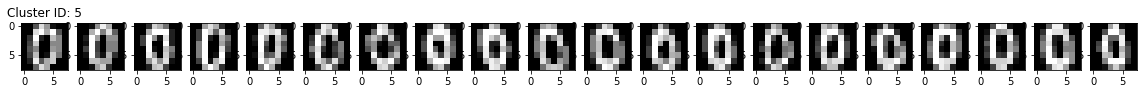

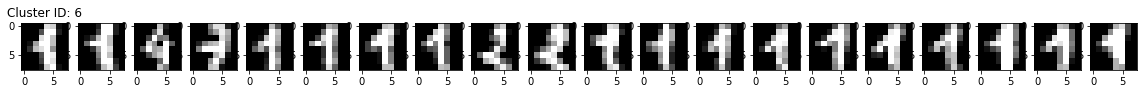

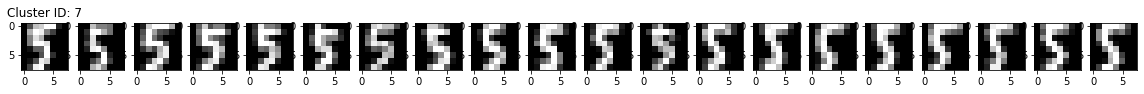

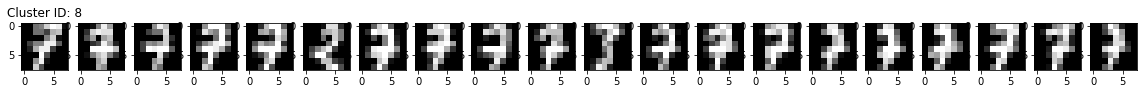

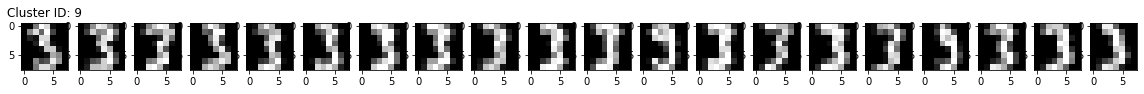

In [8]:
cluster_ids = np.unique(model.labels_)
show_nr_images = 20

for c_id in cluster_ids:
    fig, ax = plt.subplots(1, show_nr_images, figsize=(20,5))

    for i in range(show_nr_images):
        ax[i].imshow(digits['images'][model.labels_ == c_id][i], cmap='gray')
        
        if i==0:
            ax[i].set_title('Cluster ID: {}'.format(c_id))


In [ ]:
cluster_id_to_label = {
    0: 4,
    1: 9,
    2: 8,
    3: 6,
    4: 2,
    5: 0,
    6: 1,
    7: 5,
    8: 7,
    9: 3
}

### Using cluster centers for predictions

In [25]:
predicted_cluster_ids = model.predict(digits['data'])
predicted_labels = np.array([cluster_id_to_label[x] for x in predicted_cluster_ids])
predicted_labels

array([0, 8, 8, ..., 8, 9, 9])

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(digits['target'], predicted_labels)

0.7918753478018921

### Comparing performance with Supervised Learning

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

x = digits['data'].copy()
y = digits['target'].copy()
x, y = shuffle(x, y) 

model = RandomForestClassifier(n_estimators=100, random_state=0)

scores = cross_val_score(model, x, y, cv=5, verbose=True, scoring='accuracy', n_jobs=4)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.4s finished


In [57]:
scores

array([0.98901099, 0.96685083, 0.97214485, 0.96918768, 0.97746479])

In [60]:
np.mean(scores)

0.9749318256678702